## <center>Evaluate TICA parameters by Examination</center>

##### MUST SHARE KERNEL WITH NOTEBOOK `00-load-data.ipynb`

- extras for this notebook

In [46]:
plot_these = ["ltj"]
cc2 = get_hls_palette(len(tica_lags)+1)
n_dim = 20
n_timescales = 10
n_evecs = 10

master_evecs = {
    feat: normalize_cols(
        all_models[feat]["ltj"]["tica"][-2]["result"].eigenvectors[:,:n_evecs])
    for feat in all_models
}

### TICA Results from Long Trajectory `master` dataset for different lag times
--------------

#### <center>Cumulative Variance plots</center>

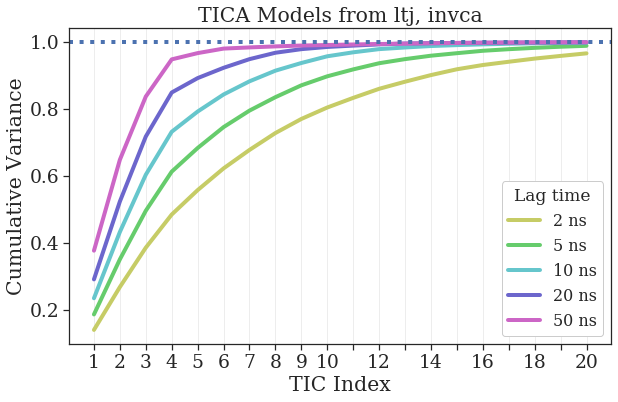

In [47]:
for i,nm in enumerate(plot_these):
    plt.close()
    #fig, axes = plt.subplots(len(plot_these),2,figsize=(16,22), sharey=True)
    fig, axes = plt.subplots(
        n_features, 1,
        figsize=(9,6*n_features),
        sharey=True,
        squeeze=False)
    
    for k,feat in enumerate(features):
        for j,setup in enumerate(all_models[feat][nm]["tica"]):
            seaborn.lineplot(
                range(1,1+n_dim),
                setup["result"].cumvar[:n_dim],
                color=cc2[j],#cc2[1::2][j],
                linewidth=4,
                label="%d ns" % (
                    int(0.02 * setup["kwargs"]["lag"])
                ) if int(0.02 * setup["kwargs"]["lag"]) > 1
                else "%0.2f ns" % (
                    0.02 * setup["kwargs"]["lag"]
                ),
                ax=axes[0][k]
            )

        axes[0][k].axhline(1., lw=4, ls=":")
        axes[0][k].set_title("TICA Models from %s, %s" % (nm,feat))
        axes[0][k].set_xlabel("TIC Index")
        axes[0][k].set_ylabel("Cumulative Variance")
        axes[0][k].set_xticks(range(1,1+n_dim))
        axes[0][k].set_xticklabels(
            ["1"] + [
            str(l) if (l<=10 or l%2==0)
            else " "
            for l in range(2,1+n_dim)]
        )
        axes[0][k].legend(title="Lag time", framealpha=1.,
            fontsize=16, title_fontsize=17)

        axes[0][k].grid(axis="x", alpha=0.35)

    plt.tight_layout()
    plt.savefig("%s/%s-tica_cumvar.png"%(str(da),nm), dpi=1200)

--------------
#### <center>Timescales</center>

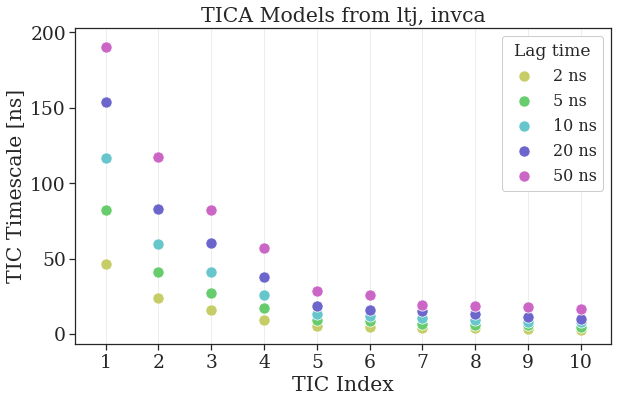

In [48]:
for i,nm in enumerate(plot_these):
    plt.close()
    #fig, axes = plt.subplots(len(plot_these),2,figsize=(16,22), sharey=True)
    fig, axes = plt.subplots(n_features,1,figsize=(9,6*n_features), sharey=True, squeeze=False)
    for k,feat in enumerate(features):
        for j,setup in enumerate(all_models[feat][nm]["tica"]):
            seaborn.scatterplot(
                range(1,1+n_timescales),
                setup["result"].timescales[:n_timescales] * ns_per_step,
                color=cc2[j],#cc2[1::2][j],
                s=125,
                label="%d ns" % (
                    int(0.02 * setup["kwargs"]["lag"])
                ) if int(0.02 * setup["kwargs"]["lag"]) > 1
                else "%0.2f ns" % (
                    0.02 * setup["kwargs"]["lag"]
                ),
                ax=axes[0][k]
            )
    
        axes[0][k].set_title("TICA Models from %s, %s" % (nm,feat))
        axes[0][k].set_xlabel("TIC Index")
        axes[0][k].set_ylabel("TIC Timescale [ns]")
        axes[0][k].set_xticks(range(1,1+n_timescales))
        axes[0][k].set_xticklabels(
            ["1"] + [
            str(l) if (l<=10 or l%2==0)
            else " "
            for l in range(2,1+n_timescales)]
        )
        axes[0][k].legend(title="Lag time", framealpha=1.,
            fontsize=16, title_fontsize=17)

        axes[0][k].grid(axis="x", alpha=0.35)

    plt.tight_layout()
    plt.savefig("%s/%s-tica_timescales.png"%(str(da),nm), dpi=1200)

-----------

#### <center>Similarity of TICs to chosen `master` TIC 20ns lag time</center>

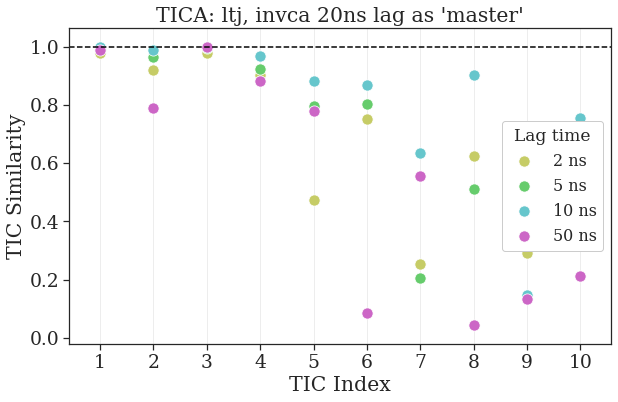

In [49]:
for i,nm in enumerate(plot_these):
    plt.close()
    
    fig, axes = plt.subplots(
        n_features,1,
        figsize=(9,6*n_features),
        sharey=True,
        squeeze=False,
    )
    
    for k,feat in enumerate(features):
        mevecs = master_evecs[feat]
        
        for j,setup in enumerate(all_models[feat][nm]["tica"]):
            
            evecs = normalize_cols(setup["result"].eigenvectors[:,:n_evecs])
            dot_by_evec = np.abs((mevecs*evecs).sum(0))
            
            if np.abs(np.sum(dot_by_evec) - dot_by_evec.shape[0]) < 0.001:
                continue
            
            seaborn.scatterplot(
                range(1,1+n_evecs),
                dot_by_evec,
                
                color=cc2[j],#cc2[1::2][j],
                s=125,
                label="%d ns" % (
                    int(0.02 * setup["kwargs"]["lag"])
                ) if int(0.02 * setup["kwargs"]["lag"]) > 1
                else "%0.2f ns" % (
                    0.02 * setup["kwargs"]["lag"]
                ),
                ax=axes[0][k]
            )
    
        axes[0][k].axhline(1, c="black", ls="--")
        axes[0][k].set_title("TICA: %s, %s 20ns lag as 'master'" % (nm,feat))
        axes[0][k].set_xlabel("TIC Index")
        axes[0][k].set_ylabel("TIC Similarity")
        axes[0][k].set_xticks(range(1,1+n_timescales))
        axes[0][k].set_xticklabels(
            ["1"] + [
            str(l) if (l<=10 or l%2==0)
            else " "
            for l in range(2,1+n_timescales)]
        )
        axes[0][k].legend(title="Lag time", framealpha=1.,
            fontsize=16, title_fontsize=17, loc='right')

        axes[0][k].grid(axis="x", alpha=0.35)

    plt.tight_layout()
    plt.savefig("%s/%s-tica_evec-dot-overlags-20master.png"%(str(da),nm), dpi=1200)

---------------------

#### <center>Similarity of TICs to chosen `master` TIC 50ns lag time</center>

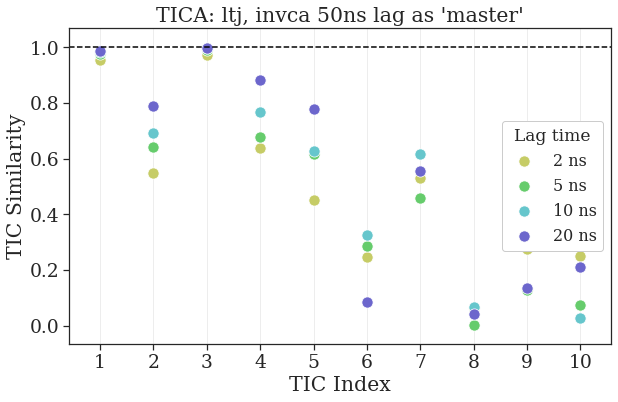

In [50]:
n_evecs = 10
master_evecs = {
    feat: normalize_cols(
        all_models[feat]["ltj"]["tica"][-1]["result"].eigenvectors[:,:n_evecs])
    for feat in features
}

for i,nm in enumerate(plot_these):
    plt.close()
    
    fig, axes = plt.subplots(
        n_features,1,
        figsize=(9,6*n_features),
        sharey=True, squeeze=False)
    
    for k,feat in enumerate(features):
        mevecs = master_evecs[feat]
        
        for j,setup in enumerate(all_models[feat][nm]["tica"]):
            
            evecs = normalize_cols(setup["result"].eigenvectors[:,:n_evecs])
            dot_by_evec = np.abs((mevecs*evecs).sum(0))
            
            if np.abs(np.sum(dot_by_evec) - dot_by_evec.shape[0]) < 0.001:
                continue
            
            seaborn.scatterplot(
                range(1,1+n_evecs),
                dot_by_evec,
                
                color=cc2[j],#cc2[1::2][j],
                s=125,
                label="%d ns" % (
                    int(0.02 * setup["kwargs"]["lag"])
                ) if int(0.02 * setup["kwargs"]["lag"]) > 1
                else "%0.2f ns" % (
                    0.02 * setup["kwargs"]["lag"]
                ),
                ax=axes[0][k]
            )
    
        axes[0][k].axhline(1, c="black", ls="--")
        axes[0][k].set_title("TICA: %s, %s 50ns lag as 'master'" % (nm,feat))
        axes[0][k].set_xlabel("TIC Index")
        axes[0][k].set_ylabel("TIC Similarity")
        axes[0][k].set_xticks(range(1,1+n_timescales))
        axes[0][k].set_xticklabels(
            ["1"] + [
            str(l) if (l<=10 or l%2==0)
            else " "
            for l in range(2,1+n_timescales)]
        )
        axes[0][k].legend(title="Lag time", framealpha=1.,
            fontsize=16, title_fontsize=17, loc='right')

        axes[0][k].grid(axis="x", alpha=0.35)

    plt.tight_layout()
    plt.savefig("%s/%s-tica_evec-dot-overlags-50master.png"%(str(da),nm), dpi=1200)

-----------

#### $\infty$ DONE
--------------------

In [51]:
print(colorama.Back.LIGHTBLACK_EX + \
      colorama.Fore.BLUE + \
      "  DONE LOADING DATA  ")

  DONE LOADING DATA  


-------
-----


----

----

----

----

----